In [2]:
import sys,os
import pandas as pd
import numpy as np
import warnings

import tensorflow as tf
from sklearn.utils import shuffle
from joblib import load, dump
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap
import aggmap

warnings.filterwarnings("ignore")

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #(x_train, y_train), (x_test, y_test)

In [4]:
from config import P

In [5]:
color_list = P.color_list
mnist_labels_dict = P.mnist_labels_dict
results_save_folder = P.results_save_folder

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
def gauss_noisy(X, c = 0.38):
    ''' 
    X: 4D array, n,w,h,c
    '''
    X = X/255.
    np.random.seed(123)
    X = np.clip(X + np.random.normal(size = X.shape, scale = c), 0, 1) * 255
    return X

stddevs = np.arange(0, 0.8, 0.12)

testX_noisys = []
testX_noisy_names = []
for stddev in stddevs:
    testX = x_test.reshape(-1, 28,28, 1)
    testX_noisy = gauss_noisy(testX, c = stddev)
    testX_noisys.append(testX_noisy)
    testX_noisy_names.append('stddev: %.2f' % stddev)

# add gauss noise on test set

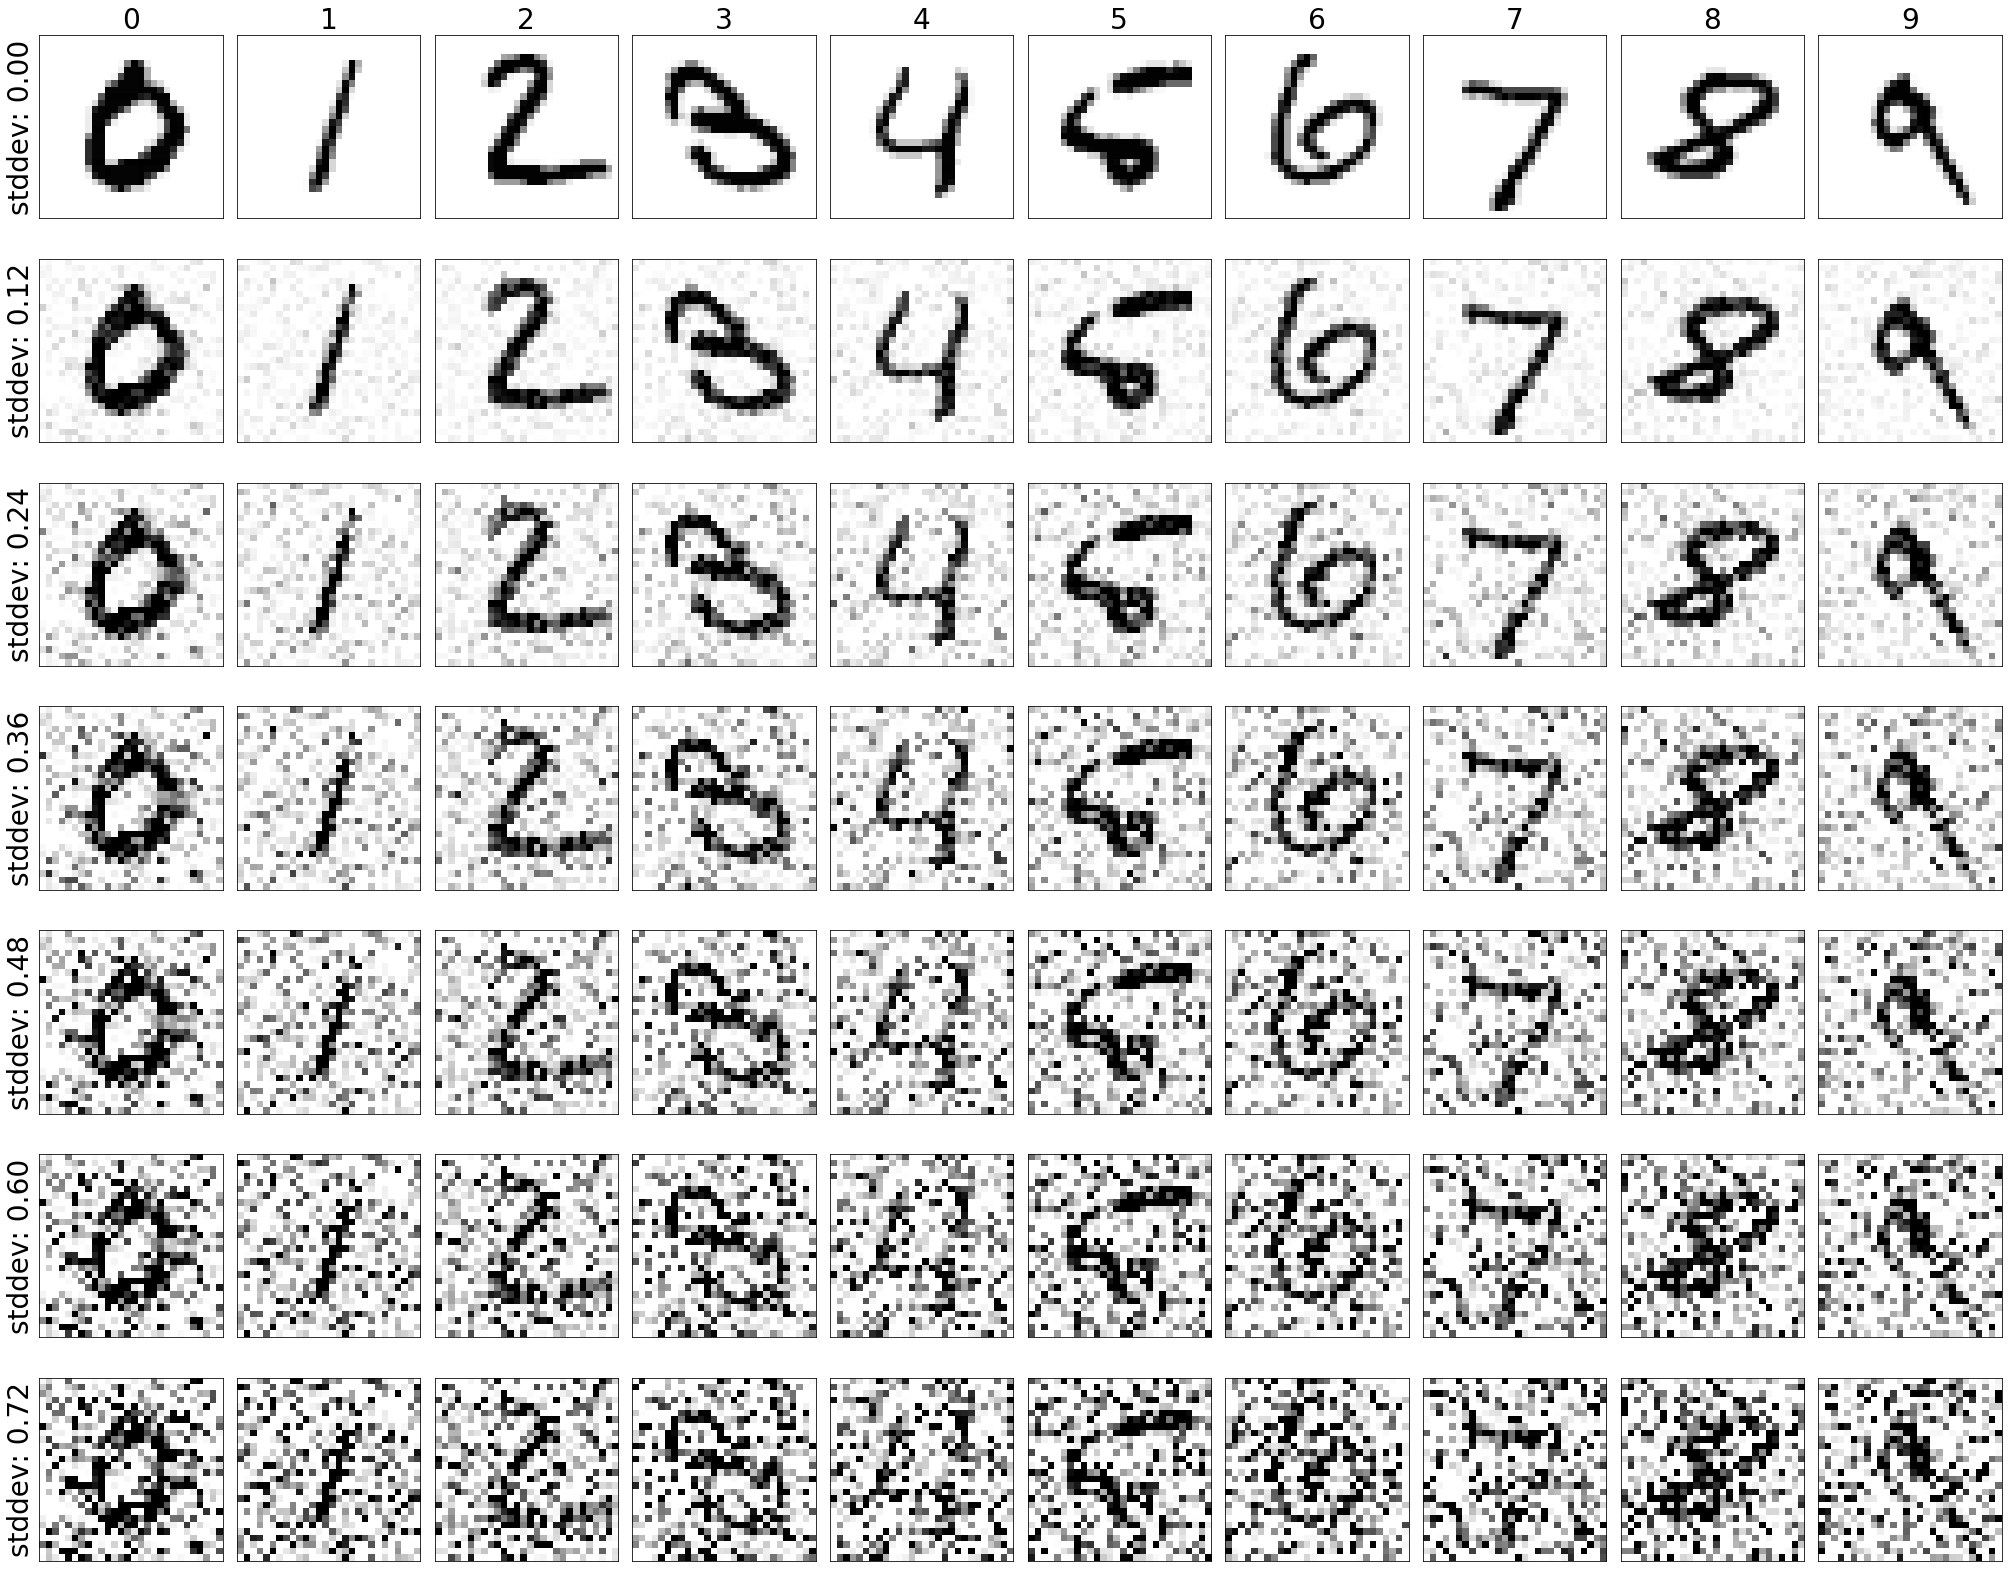

In [11]:
rows = testX_noisy_names
cols = list(mnist_labels_dict.values())

label_idxs = pd.Series(y_test).to_frame(name = 'labels').groupby('labels').apply(lambda x:x.index.to_list())

image_idx = [pd.Series(label_idxs[i][:1]).sample(1, random_state = 1).to_list()[0] for i in range(len(label_idxs))]

cols = [i for i,j in zip(cols, image_idx)]

fig, axes = plt.subplots(nrows= len(rows), ncols= len(cols), figsize=(28,22), sharex = False, sharey = False)
fontsize = 28

## plot transformed images
for axc, x_ in zip(axes, testX_noisys):
    for ax, idx in zip(axc, image_idx):
        x = x_[idx].astype(float)
        ax.imshow(x.reshape((28,28)), cmap=plt.cm.Greys)        
        #imshow(x, ax=ax, vmin = 0, vmax = 1) #, color_list = ['black']
        ax.set_xticks([]) 
        ax.set_yticks([])
        
for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontdict = {'fontsize': fontsize})
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, fontsize = fontsize)    

fig.tight_layout()
fig.savefig(os.path.join(results_save_folder, 'featuremaps_gauss_noisy.svg'), bbox_inches='tight', dpi=400) 
fig.savefig(os.path.join(results_save_folder, 'featuremaps_gauss_noisy.pdf'), bbox_inches='tight', dpi=400)